$$ ITI \space AI-Pro: \space Intake \space 45 $$


$$ Deep \space Learning $$
$$ Lab \space no. \space 5 $$

# `01` Assignment 01

- Design your LSTM learning model to classify hand-written digits (MNIST dataset).
- To handle images as a sequence, the LSTM input can be seen as a 28 sequences
of 28 elements each (taking each row of pixels as a single time step input).
- Then, you can use dense layer(s) on top (connected to the
output of the LSTM).
- Important Notes:
  - Image Size: $28\times28$
  - Use $80\%$ of the provided training data for training and $20\%$ for validation (Keep the test data for testing after training).
  - Use $32$ units in the LSTM layer and $15\%$ recurrent dropout.
  - Use Categorical Cross Entropy for the loss calculation, `Adam` for optimization and `accuracy` for metrics.


  **Additional Requirements**:
  - Try adding a second LSTM layer before the dense layer(s).
  - Change the number of cells to $48, 96, 256$ and report the accuracy curve.

## `+` Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Dense, Flatten, Activation, ConvLSTM1D,Reshape
from keras.models import Sequential
from keras import Input
from tensorflow.keras.callbacks import EarlyStopping

# `+` Seed Value

In [ ]:
SEED = 907

## `+` Load & Preprocess MNIST Dataset

**Reminder:** You might need rescaling, and/or other preprocessing methods.

In [ ]:
(X_train_minst, y_train_minst), (X_test_minst, y_test_minst) =keras.datasets.mnist.load_data()

In [ ]:
print(f"Shape of X_train: {X_train_minst.shape}")
print(f"Shape of y_train: {y_train_minst.shape}")
print(f"Shape of X_test: {X_test_minst.shape}")
print(f"Shape of y_test: {y_test_minst.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [ ]:
y_train_minst =keras.utils.to_categorical(y_train_minst)
y_test_minst  =keras.utils.to_categorical(y_test_minst)

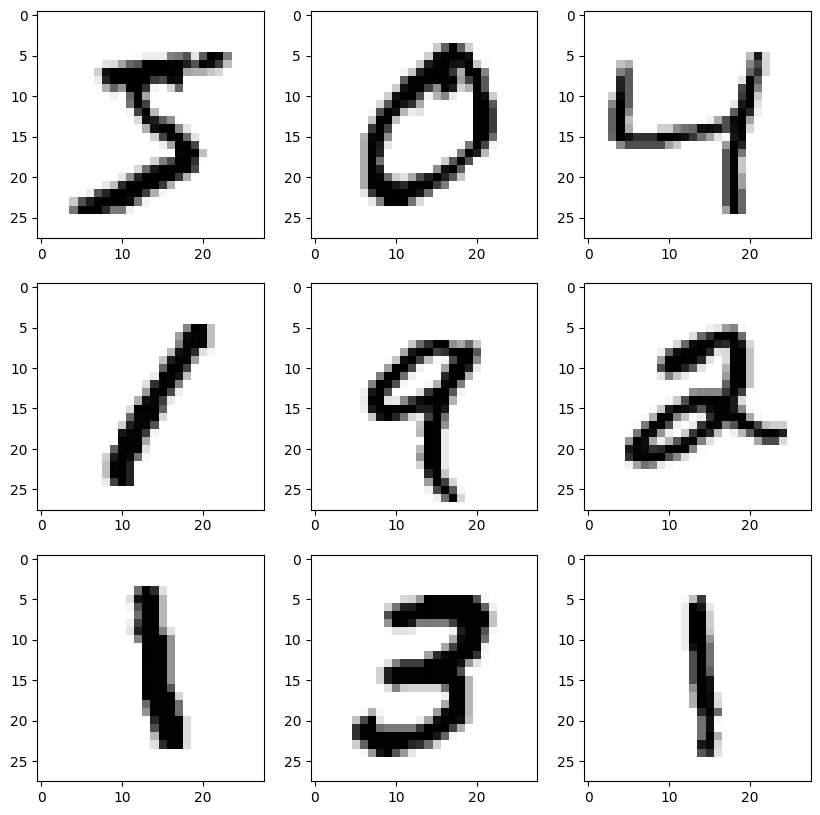

In [ ]:
# plot first few images
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train_minst[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
# Rescale the Input
X_train_minst =X_train_minst/255.0
X_test_minst  =X_test_minst/255.0

## `+` Set Global Parameters

In [ ]:
# Hyperparameters
BATCH_SIZE  =64
NUM_CLASSES =10
EPOCHS=50
SEED=124

## `i` Model Design

In [ ]:
model = Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train_minst.shape[1:]), return_sequences=True))
model.add(keras.layers.LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 28, 128)        │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,634 (869.66 KB)

 Trainable params: 222,634 (869.66 KB)

 Non-trainable params: 0 (0.00 B)

## `ii` Model Compilation & Training

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(0.00005), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_minst, y_train_minst, epochs=50, batch_size=128,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 73s 194ms/step - accuracy: 0.8366 - loss: 0.5626 - val_accuracy: 0.8737 - val_loss: 0.4254
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 209ms/step - accuracy: 0.8751 - loss: 0.4209 - val_accuracy: 0.8979 - val_loss: 0.3443
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 211ms/step - accuracy: 0.8970 - loss: 0.3432 - val_accuracy: 0.9111 - val_loss: 0.3007
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 208ms/step - accuracy: 0.9114 - loss: 0.2903 - val_accuracy: 0.9165 - val_loss: 0.2718
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 77s 194ms/step - accuracy: 0.9217 - loss: 0.2588 - val_accuracy: 0.9294 - val_loss: 0.2311
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 87s 208ms/step - accuracy: 0.9303 - loss: 0.2294 - val_accuracy: 0.9366 - val_loss: 0.2111
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 199ms/step - accuracy: 0.9347 - loss: 0.2178 - val_accuracy: 0.9380 - val_loss: 0.1988
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 210ms/step - accuracy: 0.9414 - loss: 0

## `iii` Model Evaluation

In [ ]:
loss_min_,acc_min=model.evaluate(X_train_minst, y_train_minst)
print(f"Accuracy training: {acc_min}")

loss_min_test_,acc_min_test_=model.evaluate(X_test_minst, y_test_minst)
print(f"Accuracy testing: {acc_min_test_}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9882 - loss: 0.0407
Accuracy training: 0.9851833581924438
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9691 - loss: 0.0984
Accuracy testing: 0.9749000072479248


## `iv` Result Visualization

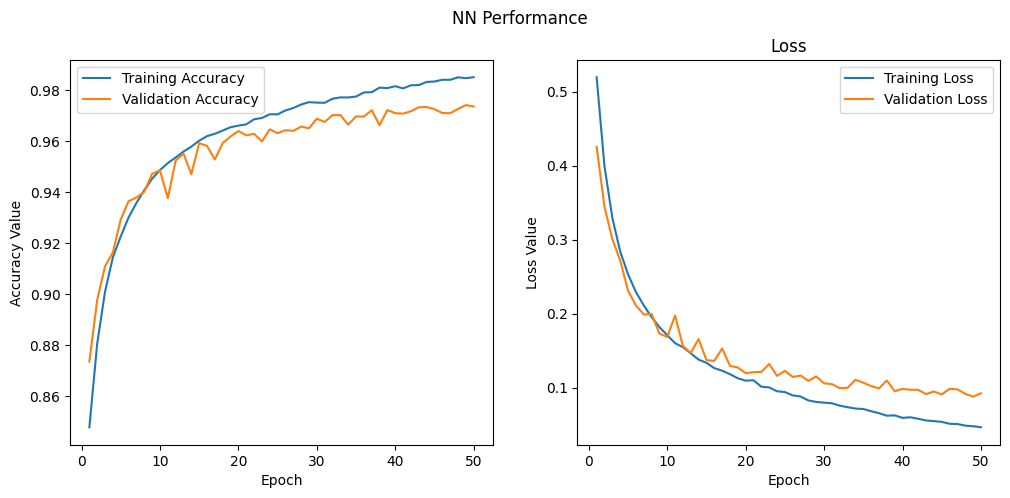

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, history.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,history.history['loss'], label='Training Loss')
ax[1].plot(epochs, history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('NN Performance')

plt.show();

## `v` **Prediction**

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

In [ ]:
y_pred = model.predict(X_test_minst)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step


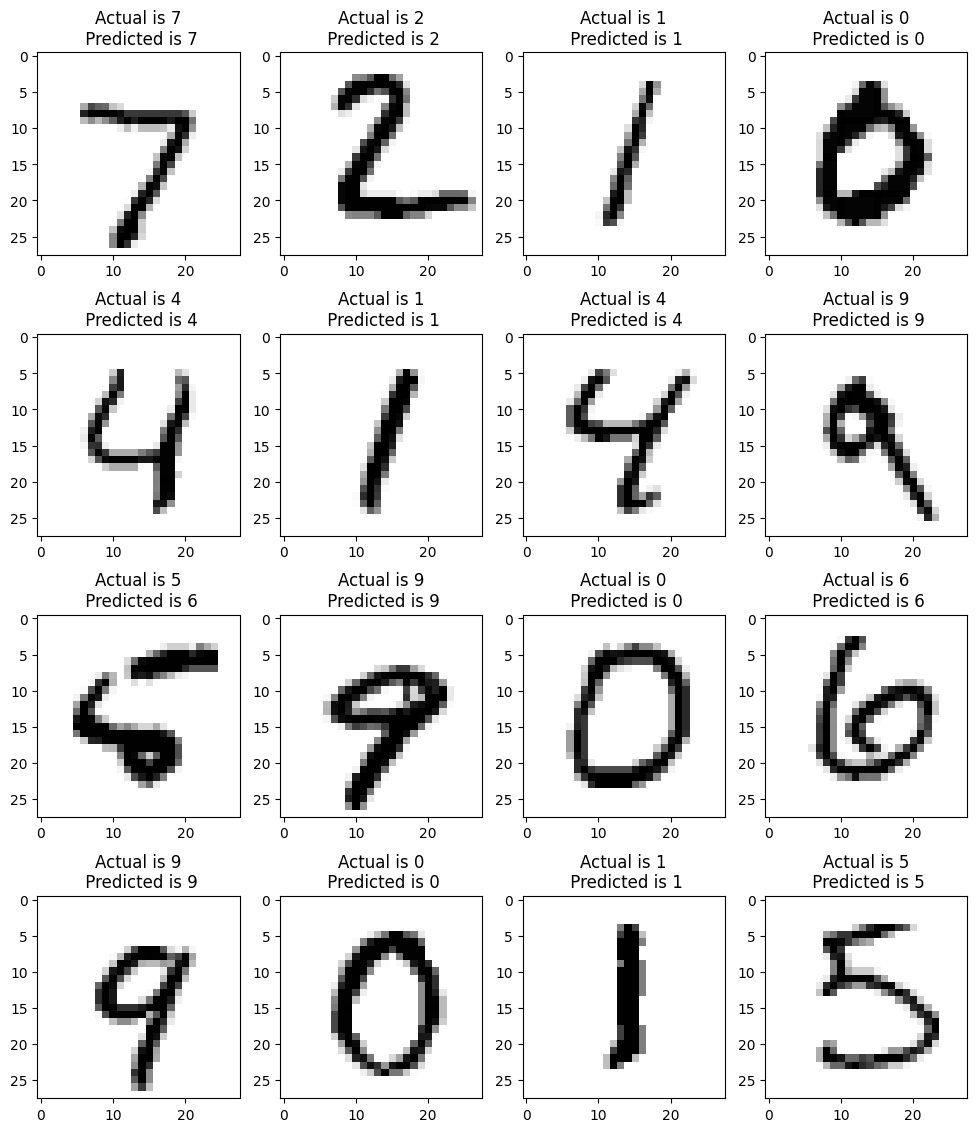

In [ ]:
X_test_minst_ = X_test_minst.reshape(-1, 28, 28, 1)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test_minst_[i].squeeze(), cmap='binary')
    ax.set(title = f"Actual is {y_test_minst[i].argmax()}\n Predicted is {y_pred[i].argmax()}")

**Note:** You can add more trials and explore different hyperparameters and design decisions as you want.

------------------------------

# Assignment 02
- Repeat assignment `01` using `ConvLSTM1D` layer instead of `LSTM`: An LSTM utilizing the power of convolutions. Read more [here](https://paperswithcode.com/method/convlstm) and [here](https://medium.com/neuronio/an-introduction-to-convlstm-55c9025563a7).
- Use the same parameters from assignment `01` in addition to:
  - Kernel Size -> Try $1$ and $3$. Which is better?
  - Padding = `same` or `valid` -> Is there a big difference?

**Note:** You might need to reshape the input (Hint: check `keras.layers.Reshape` layer)


IMPORTANT NOTE: Make sure to organize your solution, add proper documentation, and report your insights.
------------------------------

In [ ]:
X_train_minst.shape

(60000, 28, 28)

In [ ]:
X_train_minst.shape[1:]

(28, 28)

## Trial #1

### `i` Model Desgin

In [ ]:
model_conv = Sequential()
model_conv.add(Input(shape=(28, 28)))
model_conv.add(Reshape((28, 28, 1)))
model_conv.add(ConvLSTM1D(filters=64, kernel_size=(1),return_sequences=True,padding='same'))
model_conv.add(Flatten())

model_conv.add(Dense(32, activation='relu'))
model_conv.add(Dense(10, activation='softmax'))
model_conv.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d (ConvLSTM1D)        │ (None, 28, 28, 64)     │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,605,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,622,890 (6.19 MB)

 Trainable params: 1,622,890 (6.19 MB)

 Non-trainable params: 0 (0.00 B)

### `ii` Model Compilation & Training

In [ ]:
model_conv.compile(optimizer=keras.optimizers.Adam(0.00005), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_conv = model_conv.fit(X_train_minst, y_train_minst, epochs=5, batch_size=128,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 238s 627ms/step - accuracy: 0.7674 - loss: 0.8436 - val_accuracy: 0.9442 - val_loss: 0.2020
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 257s 616ms/step - accuracy: 0.9387 - loss: 0.2053 - val_accuracy: 0.9526 - val_loss: 0.1643
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 271s 640ms/step - accuracy: 0.9538 - loss: 0.1523 - val_accuracy: 0.9572 - val_loss: 0.1460
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 257s 627ms/step - accuracy: 0.9616 - loss: 0.1252 - val_accuracy: 0.9625 - val_loss: 0.1282
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 240s 640ms/step - accuracy: 0.9669 - loss: 0.1114 - val_accuracy: 0.9666 - val_loss: 0.1208


### `iii` Model Evaluation

In [ ]:
loss_min_,acc_min=model_conv.evaluate(X_train_minst, y_train_minst)
print(f"Accuracy training: {acc_min}")

loss_min_test_,acc_min_test_=model_conv.evaluate(X_test_minst, y_test_minst)
print(f"Accuracy testing: {acc_min_test_}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 112s 60ms/step - accuracy: 0.9715 - loss: 0.0970
Accuracy training: 0.9707000255584717
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9589 - loss: 0.1376
Accuracy testing: 0.9646999835968018


### `iv` Result Visualization

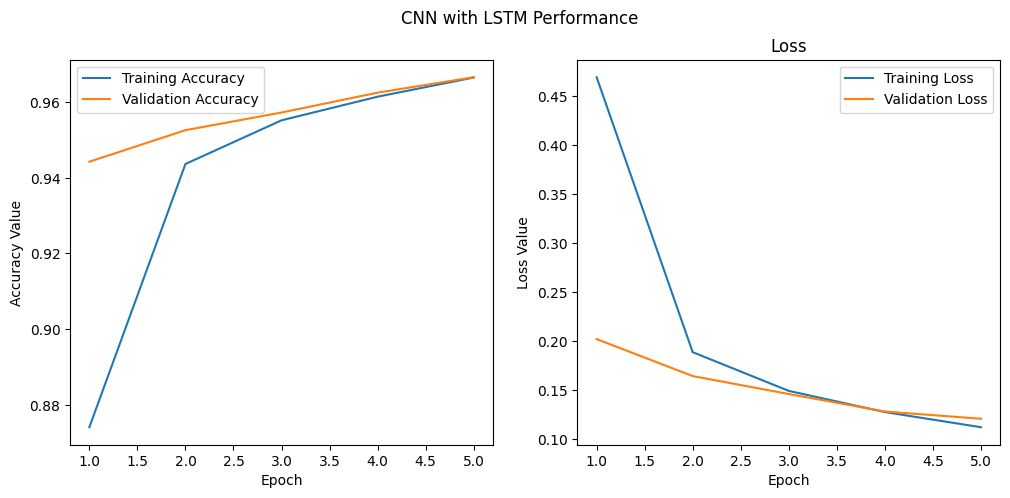

In [ ]:
epochs = range(1, len(history_conv.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, history_conv.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, history_conv.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,history_conv.history['loss'], label='Training Loss')
ax[1].plot(epochs, history_conv.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('CNN with LSTM Performance')

plt.show();

### `v` **Prediction**

In [ ]:
y_pred_conv = model_conv.predict(X_test_minst)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step


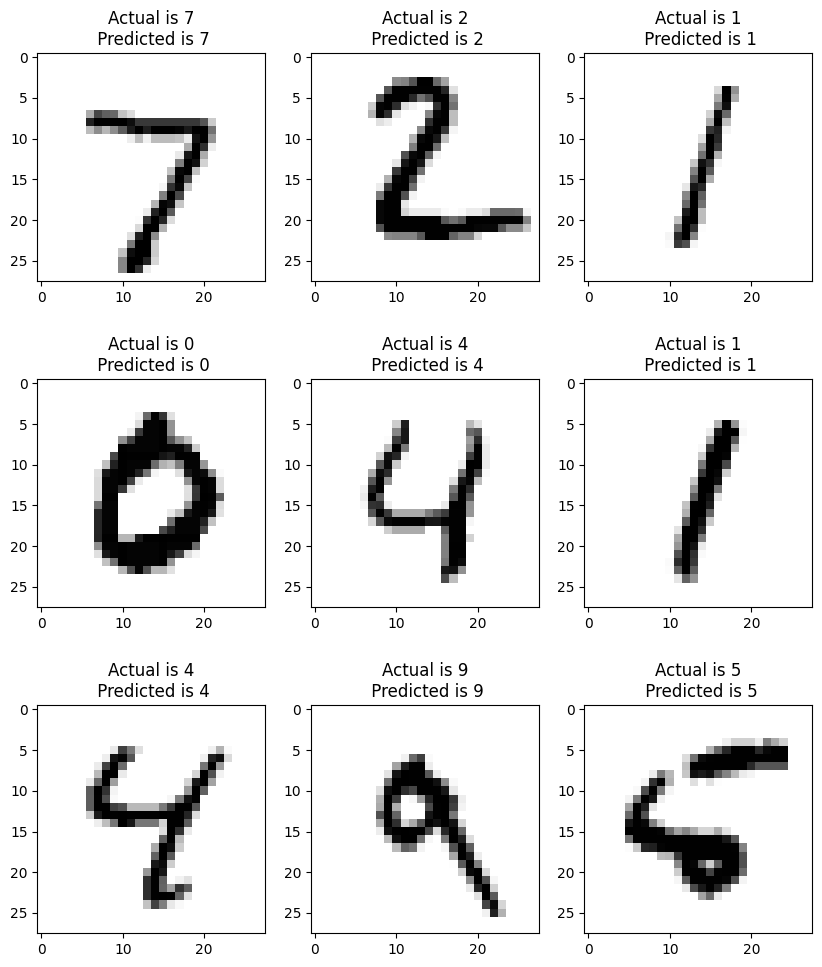

In [ ]:
X_test_minst_conv = X_test_minst.reshape(-1, 28, 28, 1)

fig, axis = plt.subplots(3, 3, figsize=(10, 12))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test_minst_conv[i].squeeze(), cmap='binary')
    ax.set(title = f"Actual is {y_test_minst[i].argmax()}\n Predicted is {y_pred_conv[i].argmax()}")

## Trial #2

### `i` Model Desgin

In [ ]:
model_conv2 = Sequential()
model_conv2.add(Input(shape=(28, 28)))
model_conv2.add(Reshape((28, 28, 1)))
model_conv2.add(ConvLSTM1D(filters=64, kernel_size=(3),return_sequences=True,padding='valid'))
model_conv2.add(Flatten())

model_conv2.add(Dense(32, activation='relu'))
model_conv2.add(Dense(10, activation='softmax'))
model_conv2.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_1 (ConvLSTM1D)      │ (None, 28, 26, 64)     │        50,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 46592)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │     1,490,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,541,482 (5.88 MB)

 Trainable params: 1,541,482 (5.88 MB)

 Non-trainable params: 0 (0.00 B)

### `ii` Model Compilation & Training

In [ ]:
model_conv2.compile(optimizer=keras.optimizers.Adam(0.00005), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_conv2 = model_conv2.fit(X_train_minst, y_train_minst, epochs=10, batch_size=128,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 386s 1s/step - accuracy: 0.8036 - loss: 0.6942 - val_accuracy: 0.9669 - val_loss: 0.1166
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 446s 1s/step - accuracy: 0.9709 - loss: 0.1049 - val_accuracy: 0.9768 - val_loss: 0.0787
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.9817 - loss: 0.0640 - val_accuracy: 0.9808 - val_loss: 0.0647
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - accuracy: 0.9888 - loss: 0.0435 - val_accuracy: 0.9841 - val_loss: 0.0576
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 434s 1s/step - accuracy: 0.9913 - loss: 0.0341 - val_accuracy: 0.9847 - val_loss: 0.0517
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.9946 - loss: 0.0244 - val_accuracy: 0.9854 - val_loss: 0.0484
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.9957 - loss: 0.0198 - val_accuracy: 0.9858 - val_loss: 0.0473
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 449s 1s/step - accuracy: 0.9968 - loss: 0.0156 - val_accu

### `iii` Model Evaluation

In [ ]:
loss_min_,acc_min=model_conv2.evaluate(X_train_minst, y_train_minst)
print(f"Accuracy training: {acc_min}")

loss_min_test_,acc_min_test_=model_conv2.evaluate(X_test_minst, y_test_minst)
print(f"Accuracy testing: {acc_min_test_}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 167s 89ms/step - accuracy: 0.9971 - loss: 0.0150
Accuracy training: 0.9952499866485596
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.9790 - loss: 0.0637
Accuracy testing: 0.9836000204086304


### `iv` Result Visualization

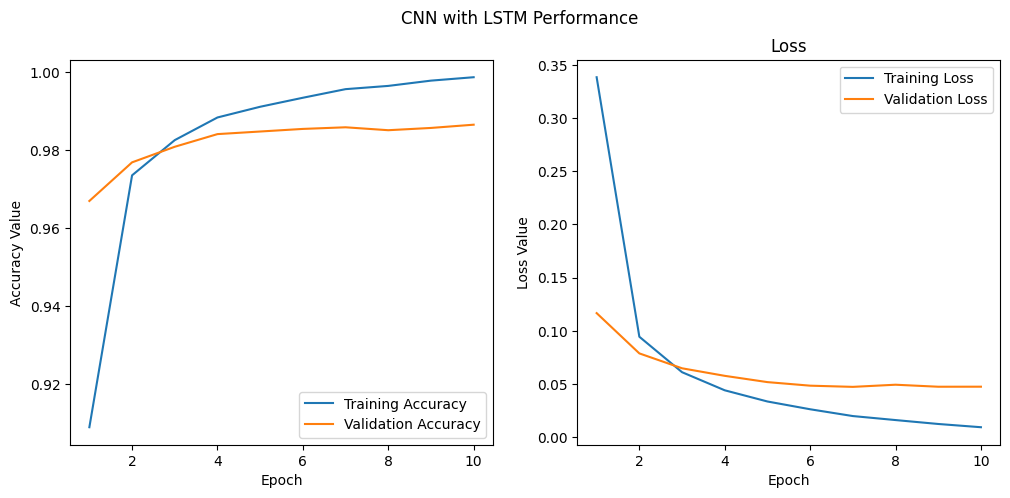

In [ ]:
epochs = range(1, len(history_conv2.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, history_conv2.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, history_conv2.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,history_conv2.history['loss'], label='Training Loss')
ax[1].plot(epochs, history_conv2.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('CNN with LSTM Performance')

plt.show();

### `v` **Prediction**

In [ ]:
y_pred_conv2 = model_conv.predict(X_test_minst)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step


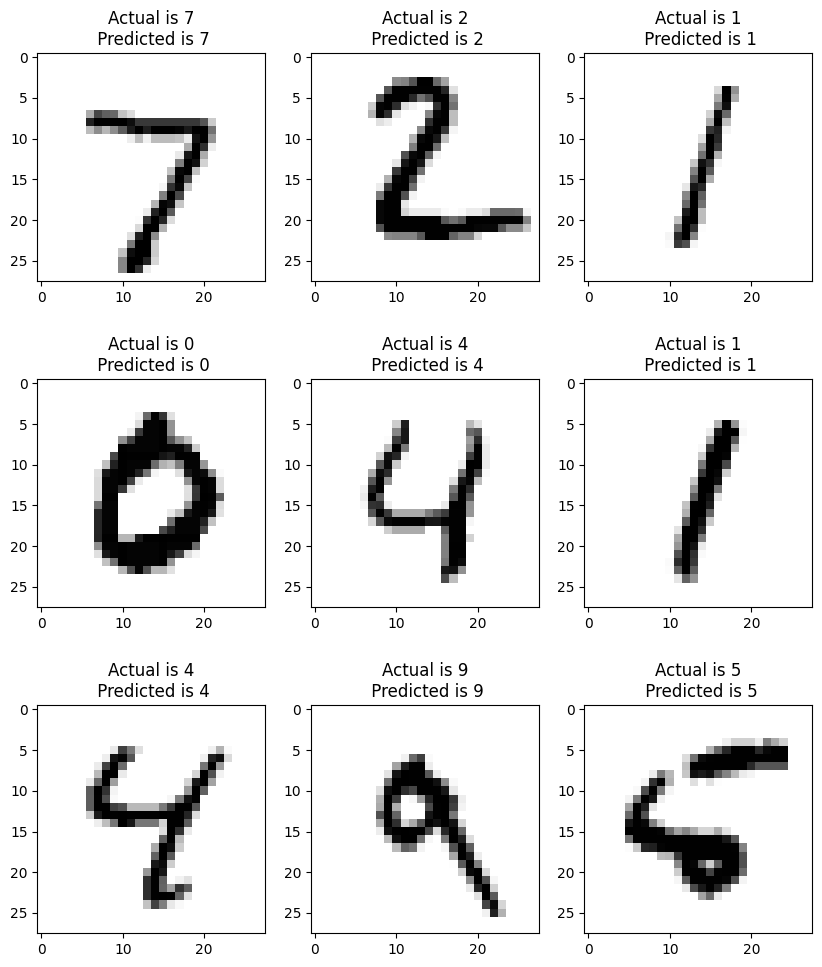

In [ ]:
X_test_minst_conv2 = X_test_minst.reshape(-1, 28, 28, 1)

fig, axis = plt.subplots(3, 3, figsize=(10, 12))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test_minst_conv2[i].squeeze(), cmap='binary')
    ax.set(title = f"Actual is {y_test_minst[i].argmax()}\n Predicted is {y_pred_conv2[i].argmax()}")

# 🔍 Insights:
*  when using CONVLSTM (CNN +LSTM ) prform better than just LSTM the accuarcy increased in training and est data
*  when using CONVLSTM with kernal size equal 3 is perform better than that with kernal size 1.

*  when using CONVLSTM with padding valid is perform better than that with padding same.

* CNN might offer similar performance with less computational overhead,but still, ConvLSTM is a great way to explore models that handle both spatial and temporal dependencies.

* CONVLSTM work well with mnist dataset but it might exceed due to simlisity of dataset.


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$